# Clustermap of numerical values

In [20]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline


In [21]:
matrix = pd.read_csv("distance_table_2000_MFW_wurzburg.csv", sep=",", encoding="utf8",index_col=0)  # CSV mit Komma als Trennzeichen
print(matrix.head())

                Arnaud_Adelson  Arnaud_Anne  Arnaud_Bal  Arnaud_Batilde  \
Arnaud_Adelson        0.000000     0.633142    0.852026        0.686660   
Arnaud_Anne           0.633142     0.000000    0.933643        0.702131   
Arnaud_Bal            0.852026     0.933643    0.000000        0.874129   
Arnaud_Batilde        0.686660     0.702131    0.874129        0.000000   
Arnaud_Clary          0.719231     0.657300    0.910234        0.755663   

                Arnaud_Clary  Arnaud_Epoux  Arnaud_Fanny  Arnaud_Julie  \
Arnaud_Adelson      0.719231      0.573369      0.649559      0.774321   
Arnaud_Anne         0.657300      0.586625      0.608714      0.663354   
Arnaud_Bal          0.910234      0.750313      0.827293      0.904946   
Arnaud_Batilde      0.755663      0.628626      0.756324      0.795536   
Arnaud_Clary        0.000000      0.617965      0.680343      0.676331   

                Arnaud_Lucie  Arnaud_Matinees  ...  Voltaire_Homme  \
Arnaud_Adelson      0.632941      

In [22]:
# Alphabetische Sortierung
matrix = matrix.sort_index(axis=0).sort_index(axis=1)

c:\Users\Administrator\pythonenv\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Administrator\pythonenv\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


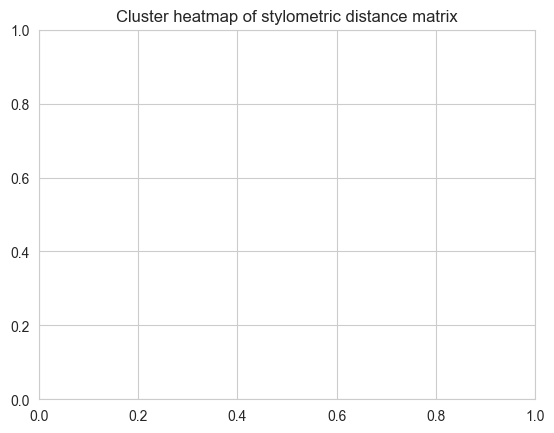

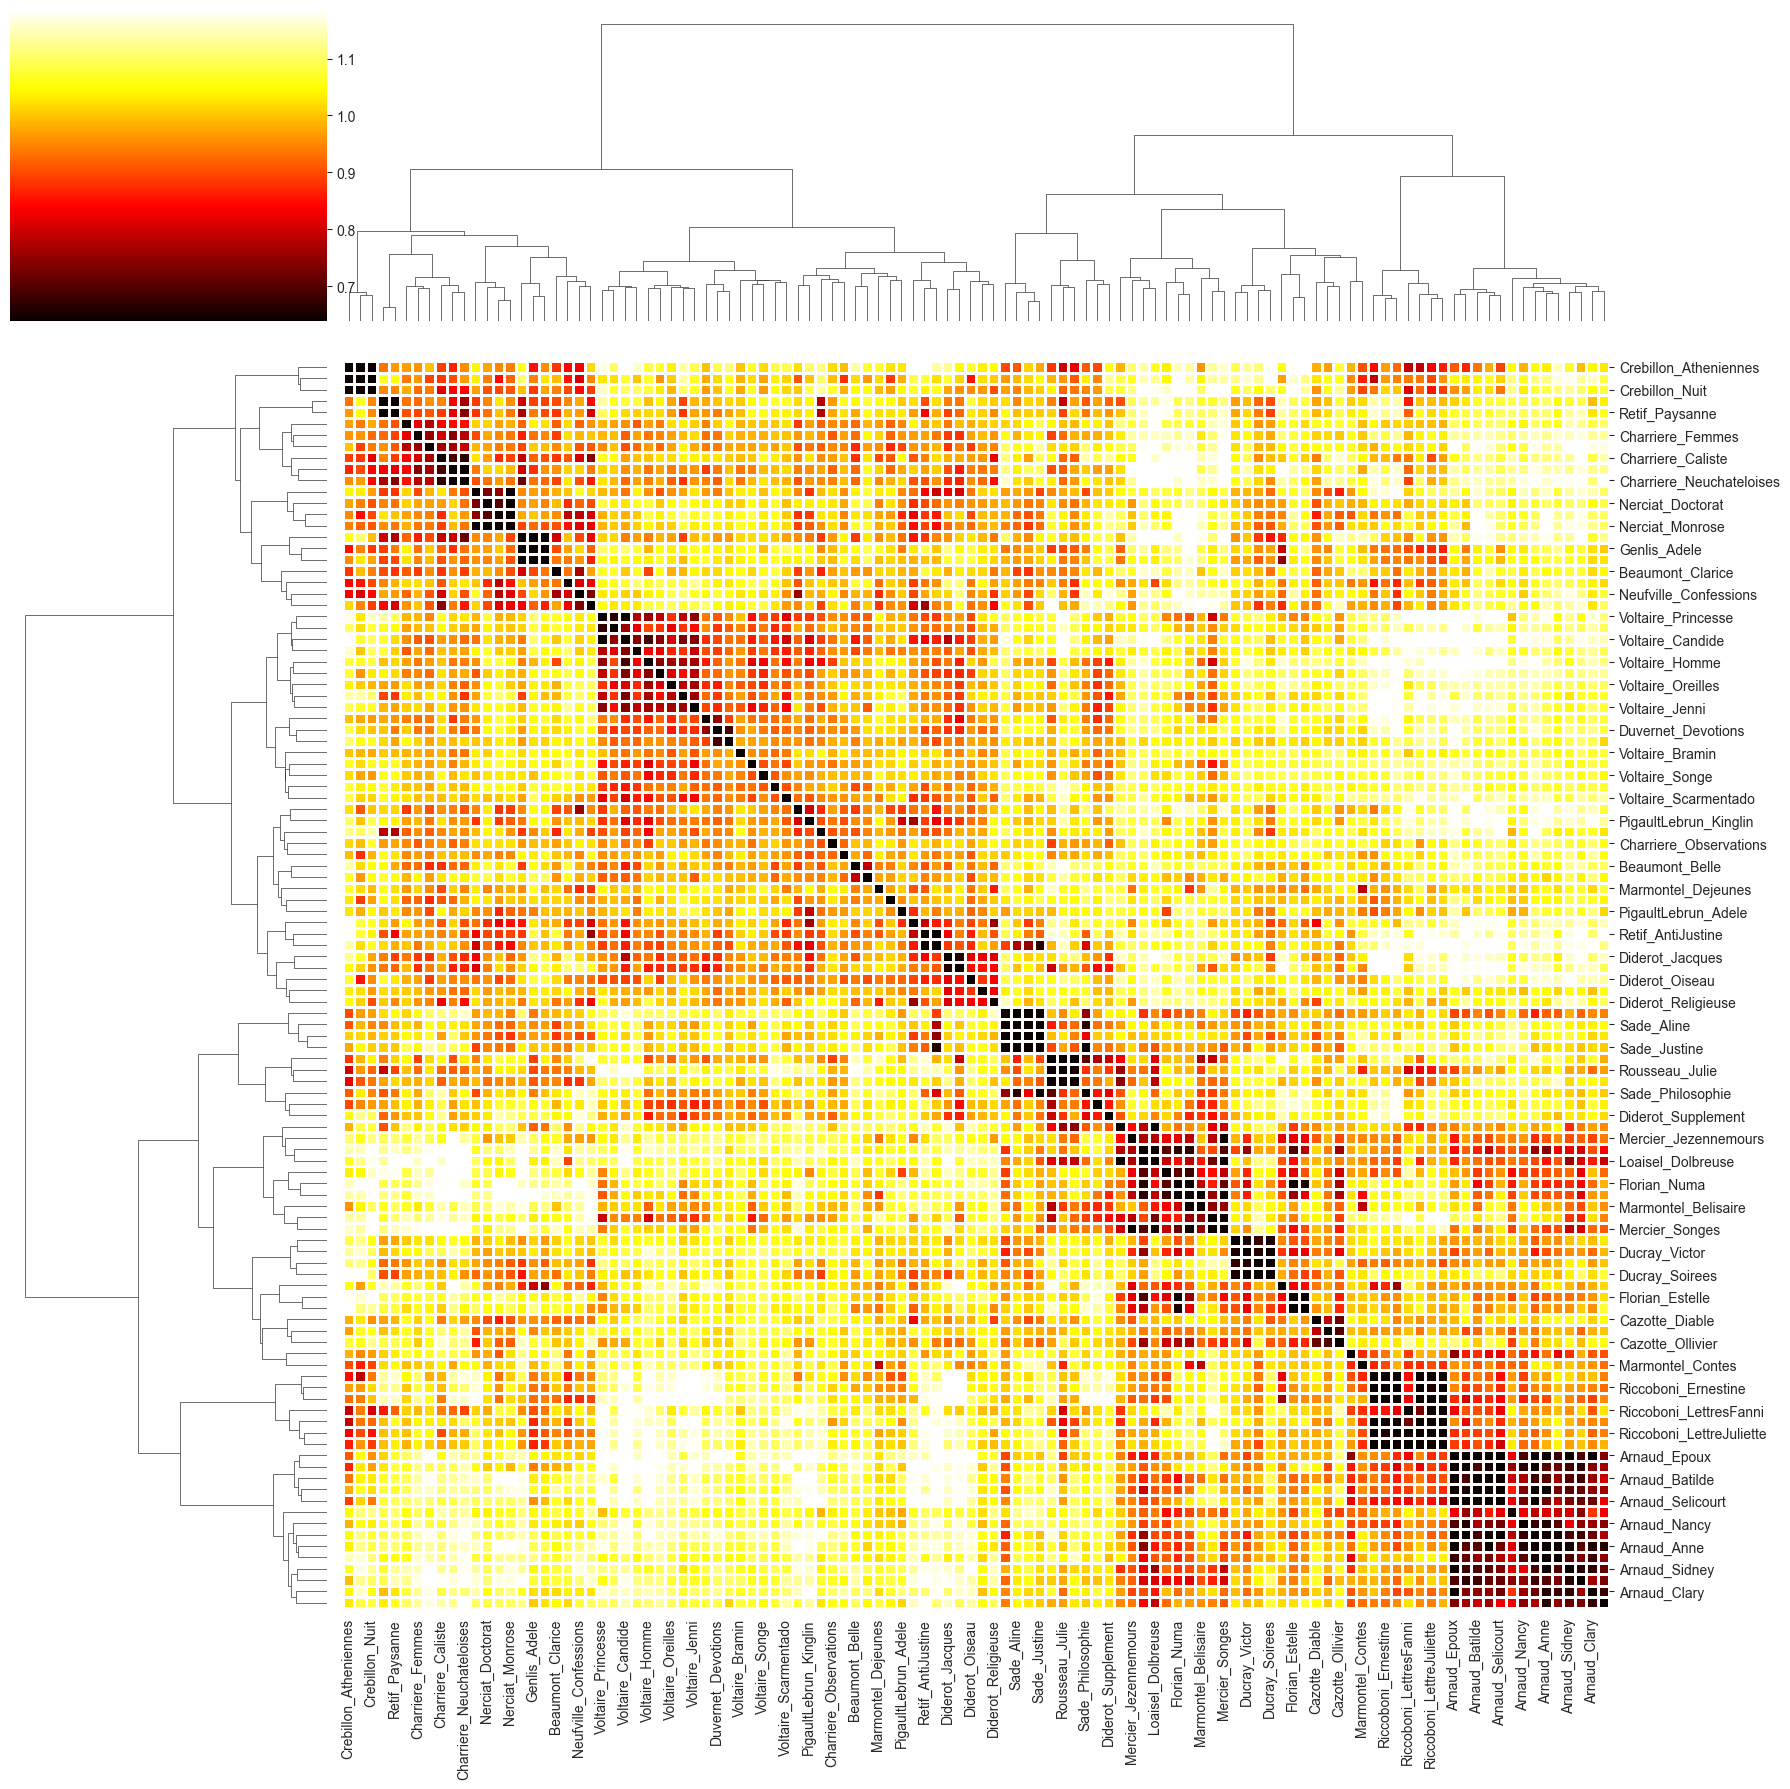

NameError: name 'clustermapfile3' is not defined

In [24]:
sns.set_style("whitegrid")
plt.figure()
plt.title("Cluster heatmap of stylometric distance matrix")
sns.clustermap(
        data=matrix,
        method="ward", # ward|centroid etc.
        robust=True,
        figsize=(18,18),
        #annot=True,
        square=False,
        linewidths=0.8,
        linecolor="white",
        cmap="hot",
        cbar=True,    
        )
plt.tight_layout()
plt.show()
plt.savefig(clustermapfile3, dpi=300)
plt.close()